# 1. Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.

# 2. Business Goal

- Prepare regression model the predict price of the house
- Identify top features affeting price of a house


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 3. EDA (EXploratory Data Analysis)

In [2]:
housing=pd.read_csv('train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
pd.set_option('display.max_columns',81)

In [6]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.1 Univaraiate Analysis

###drop id variable


In [9]:
housing.drop(axis=1,columns='Id',inplace=True)

housing.shape

(1460, 80)

### identify numerical and categorical varaibles

In [10]:
num_vars=['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',                   
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea', 'MiscVal','YearBuilt','YearRemodAdd', 'GarageYrBlt','SalePrice']



In [11]:
cat_vars=[]
for var in housing.columns:
    if var not in num_vars:
        cat_vars.append(var)

In [12]:
housing.shape

(1460, 80)

In [13]:
len(num_vars)

23

In [14]:
len(cat_vars)

57

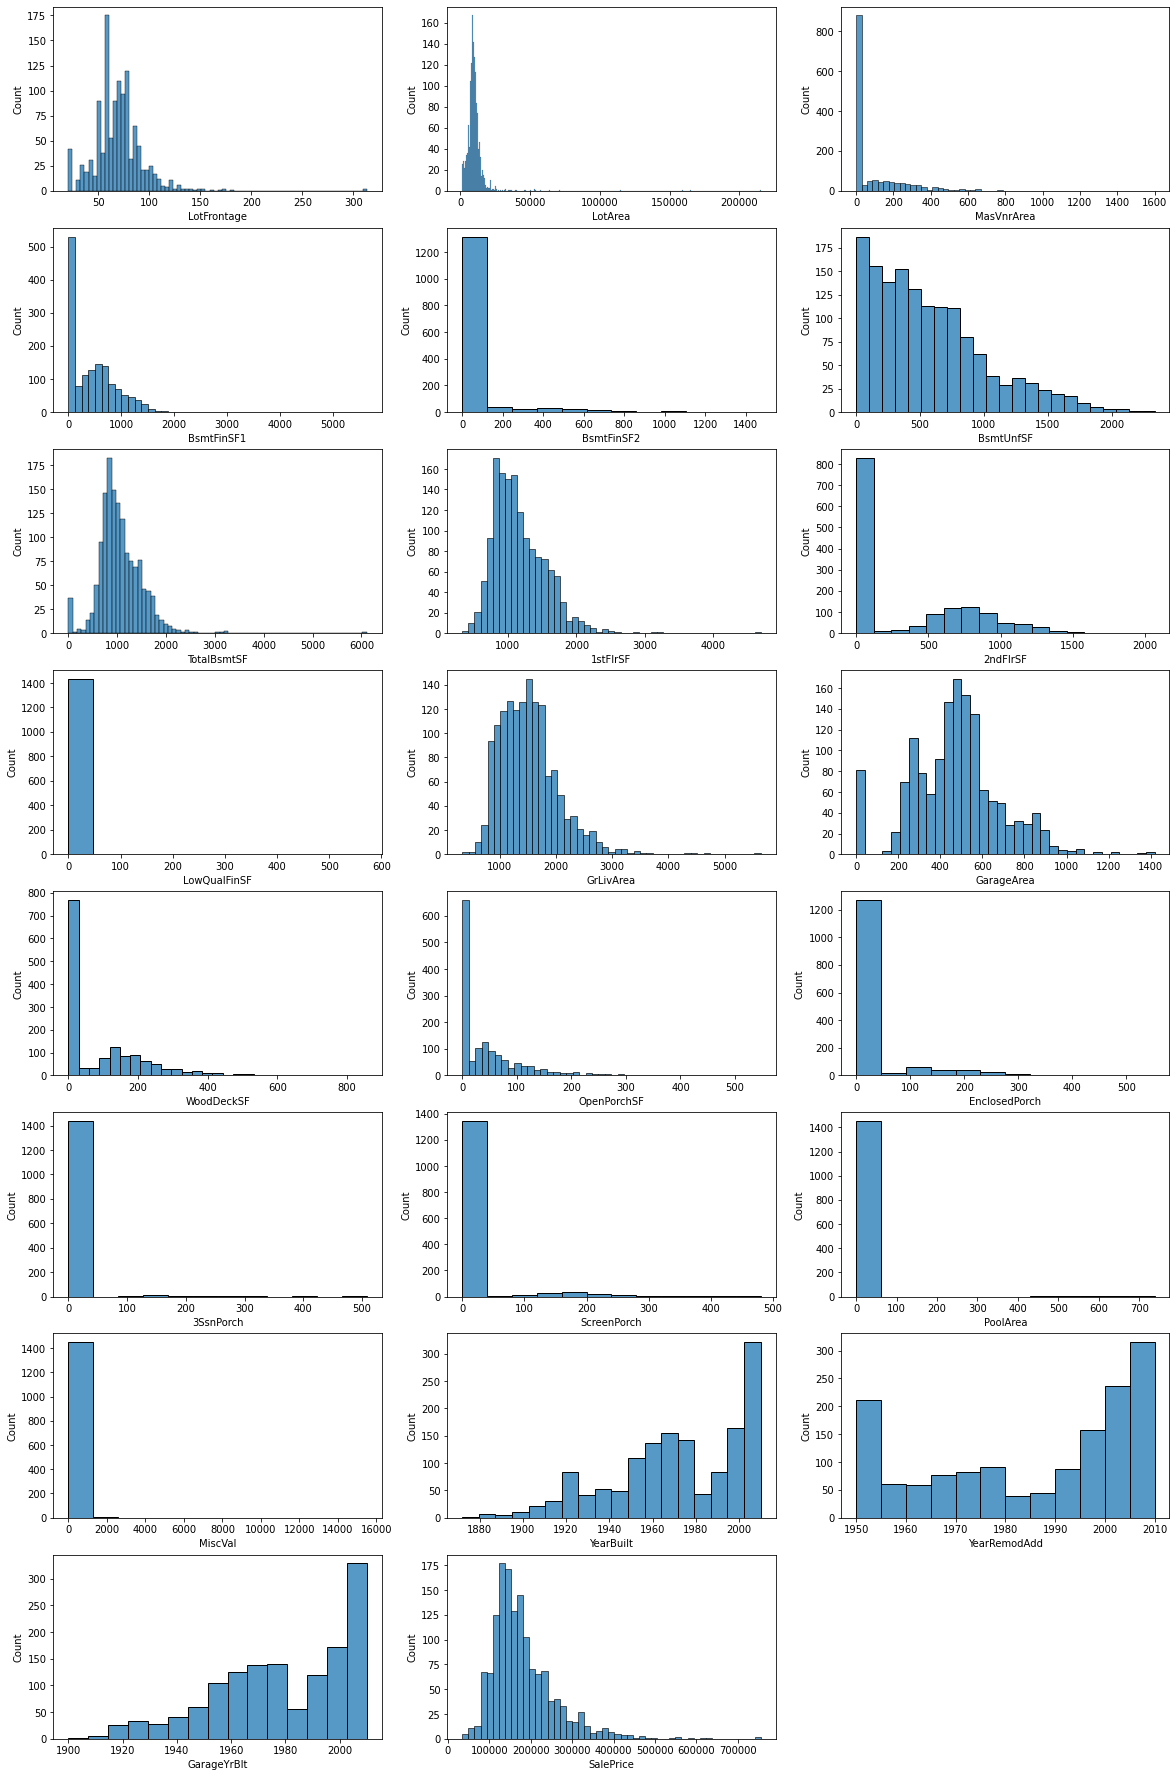

In [15]:
plt.figure(figsize=(20,40))
i=1
for var in num_vars:
    plt.subplot(10,3,i)
    sns.histplot(x=housing[var])
    i=i+1
plt.show()

#### Obeservations:
- More houses are getting built over the year . However there is a deep in housing built in 80's
- From 90's onward there is trend in remodelling of houses


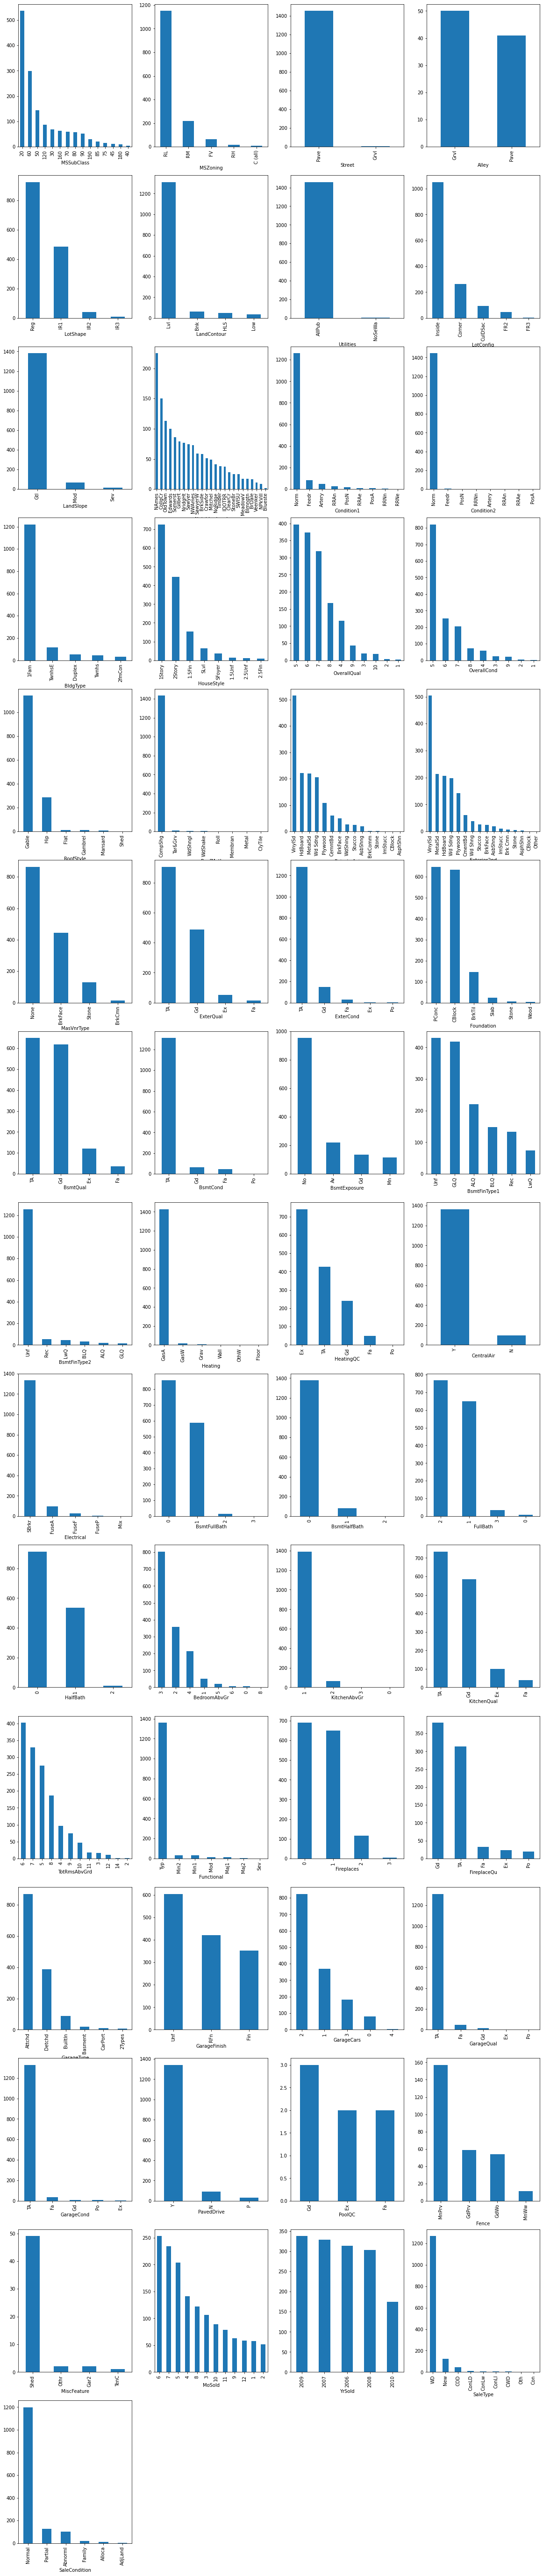

In [16]:
plt.figure(figsize=(20,100))
i=1
for var in cat_vars:
    plt.subplot(15,4,i)
    plt.xlabel(var)
    housing[var].value_counts().plot.bar()
    i=i+1
plt.show()

#### Observations
- More houses are sold in mid year from May to July
- Mostly 1 Kitchen is  constructed mabove grade
- there is more house sold with 2 Fullbath
- Garages are cosnstructre mostly or 2 car parking
- 1Fam building type are mostly sold 

## 3.2 BiVariate Analysis

<Figure size 1440x1440 with 0 Axes>

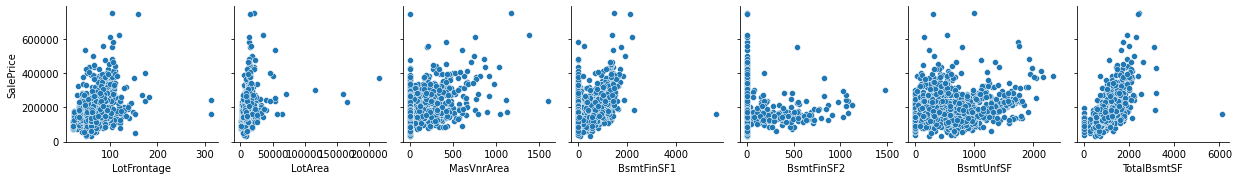

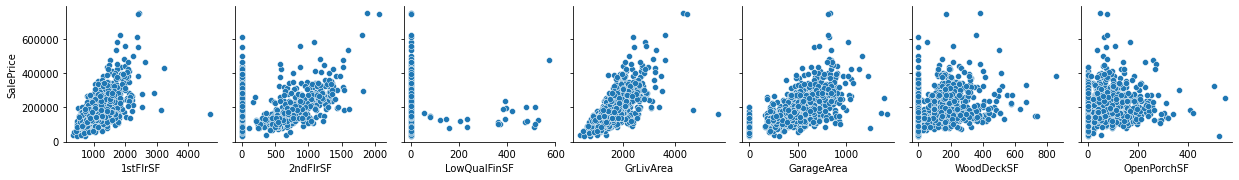

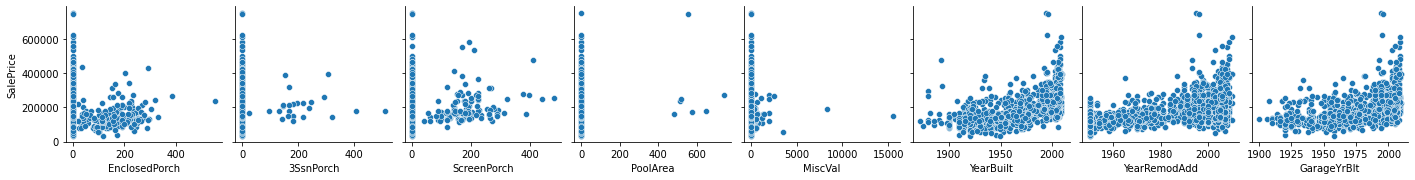

In [17]:
plt.figure(figsize=(20,20))
sns.pairplot(data=housing,x_vars=housing[['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']],y_vars='SalePrice')
plt.show()
sns.pairplot(data=housing,x_vars=housing[['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF',]],y_vars='SalePrice')
plt.show()
sns.pairplot(data=housing,x_vars=housing[['EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal','YearBuilt','YearRemodAdd', 'GarageYrBlt']],y_vars='SalePrice')
plt.show()


#### Observations
- TotalBsmtSF,1stFlrSF,2ndFlrSFT shows strong relation with sale price. This shows housing price tend to increase with house area
- GrLivArea, GarageAre also shows string relation with Saleprice
- Pool Area does not impact price that much
- YearBuilt , YearRemodAdd, GarageYearBuilt does not hos very strong relationship with price. Need to check derived metrices from these varaible

In [18]:
len(cat_vars)

57

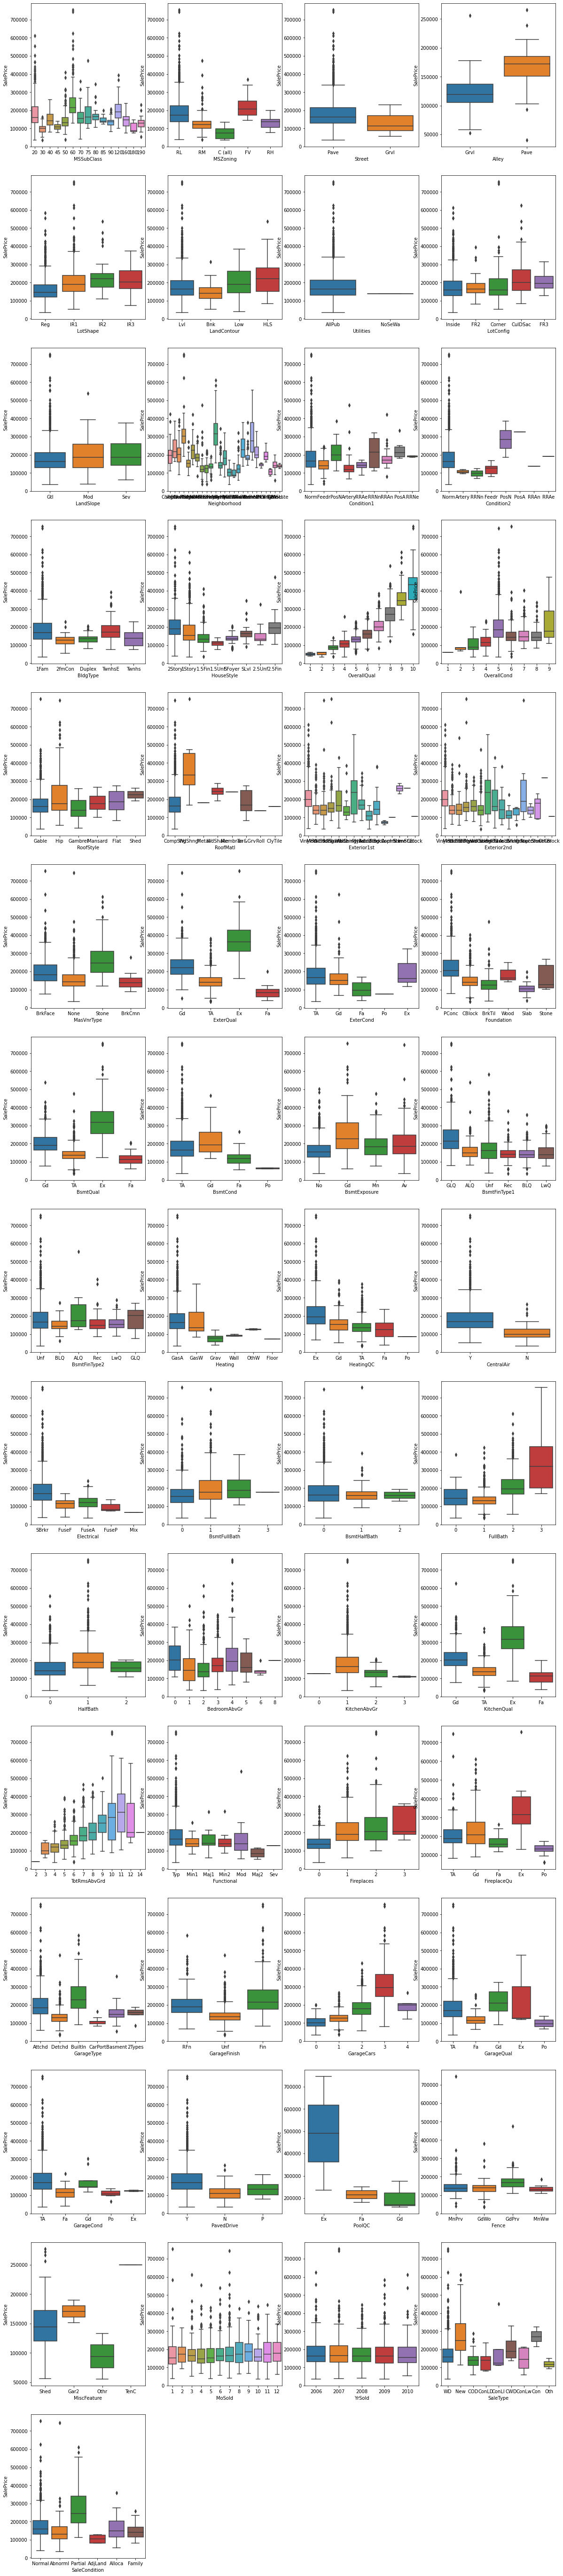

In [19]:
plt.figure(figsize=(20,100))
i=1
for var in cat_vars:
    plt.subplot(15,4,i)
    sns.boxplot(x=housing[var],y=housing['SalePrice'])
    i=i+1
plt.show()

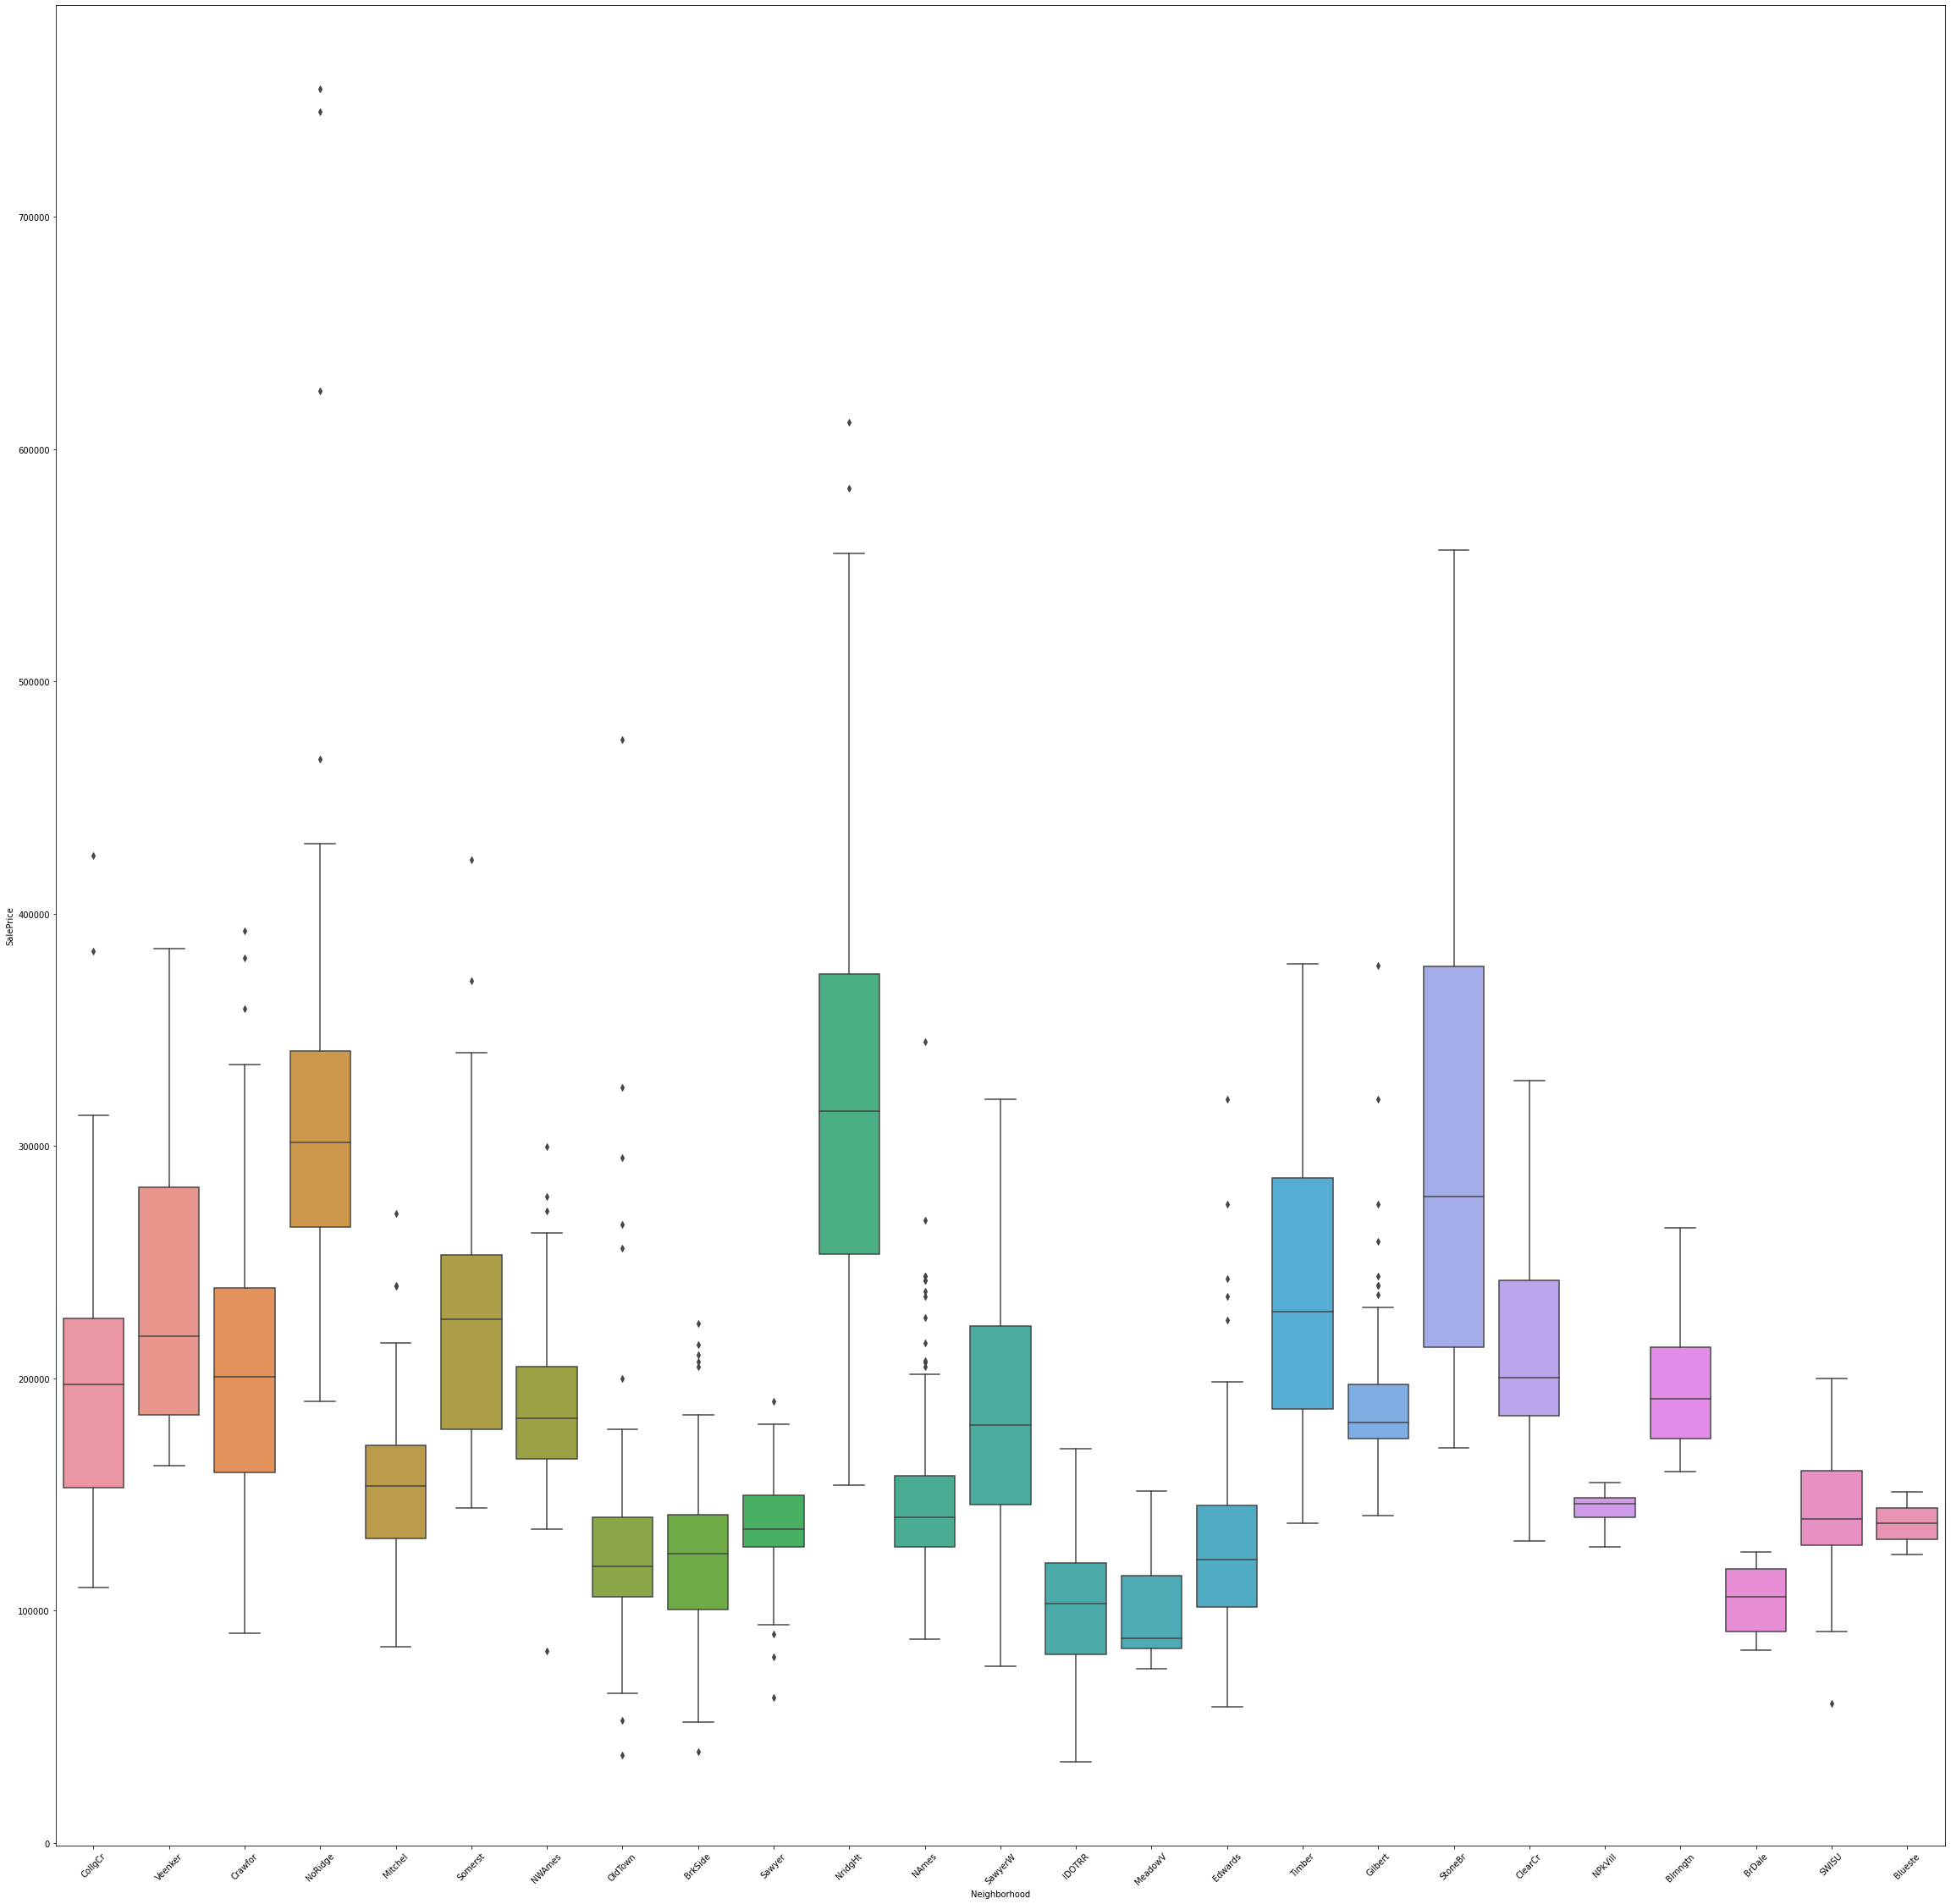

In [20]:
plt.figure(figsize=(40,40))
sns.boxplot(x=housing.Neighborhood,y=housing['SalePrice'])
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=10)
plt.rc('axes', labelsize=40)
plt.show()

#### Oservations: 
- Quality reletaed variable shows oridnal relationship with saleprice. With Excellent quality price increases
- Fullbath 3 has higher sale price
- 3 Parking place in garger is higher price than 4
- Builtin Garage has higer sale price
- no impact of sale year or month on sale price

## 3.3 Derived Metrices

In [21]:
housing['Property Age']=housing.YrSold-housing.YearBuilt
housing['Remodelled Age']=housing.YearRemodAdd-housing.YearBuilt
housing['Garage Built Diff']=housing.YearRemodAdd-housing.YearBuilt

<Figure size 1440x1440 with 0 Axes>

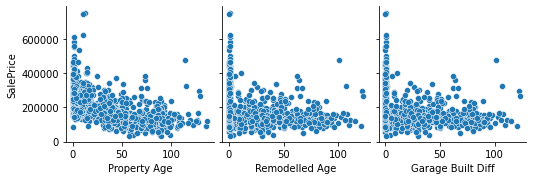

In [22]:
plt.figure(figsize=(20,20))
plt.rc('xtick', labelsize=10)
plt.rc('axes', labelsize=10)
sns.pairplot(data=housing,x_vars=housing[['Property Age','Remodelled Age','Garage Built Diff']],y_vars='SalePrice')
plt.show()

- Property Age Shows better relationship with Sale price that year built

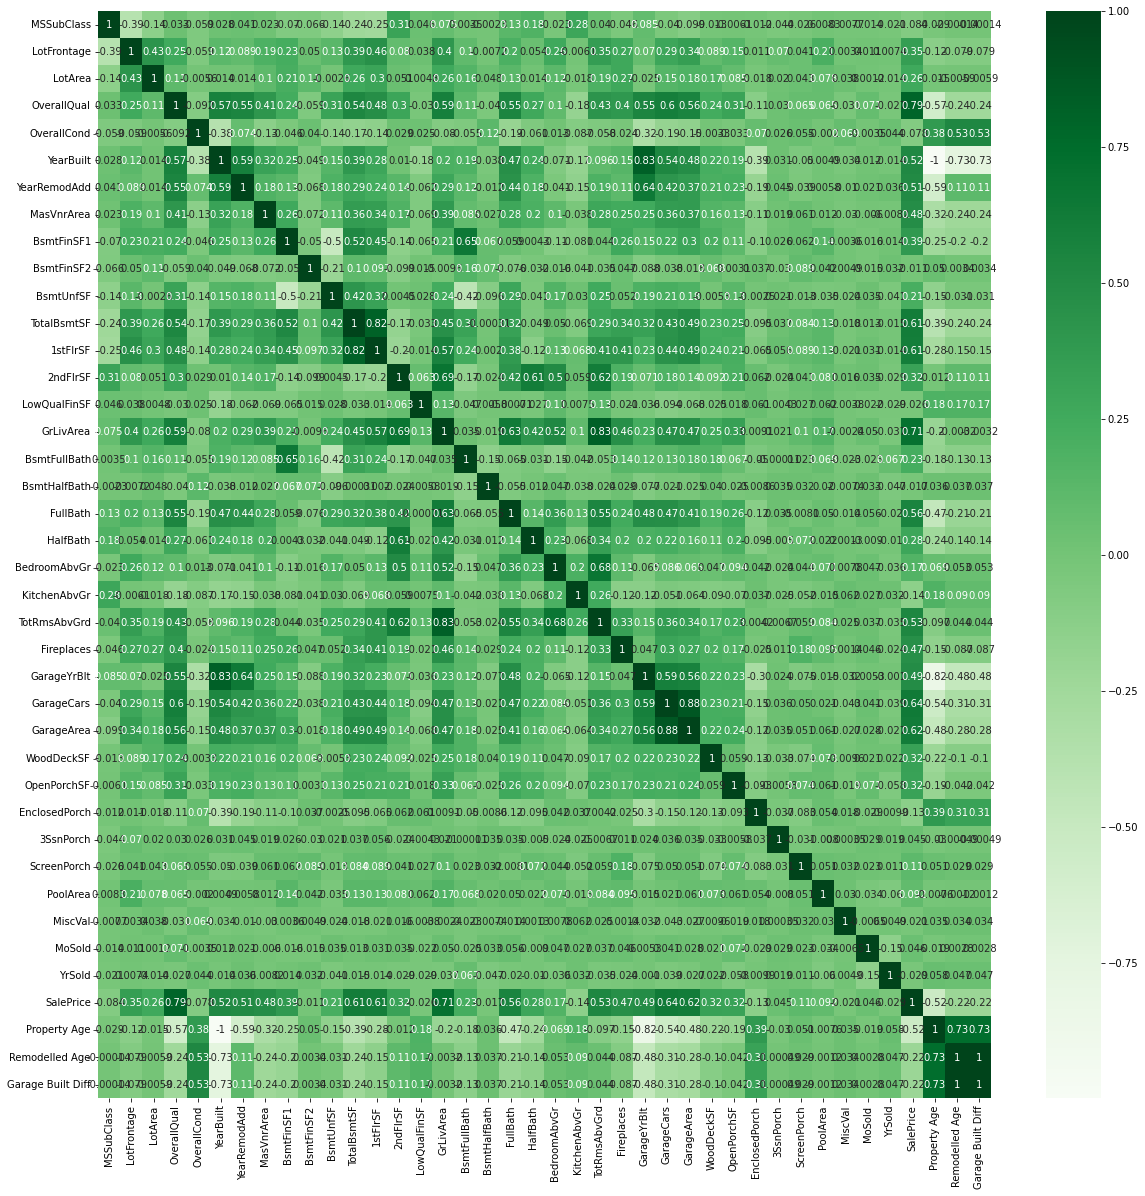

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(housing.corr(),annot=True,cmap='Greens')
plt.show()

- YearRemodAdd showing stromg correlation with GarageYearBuilt and FullBath. So mostlikelt the remodel were done for garage and fullbath

## 3.4 Data Imputation

In [24]:
def null_percentage():
    null_ratio=100*housing.isnull().sum()[housing.isnull().sum() > 0]/len(housing.index)
    print(null_ratio)

In [25]:
null_percentage()

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [26]:
print(((housing.GarageArea>0) & (housing.GarageQual.isnull()==True)).sum())

0


#### Checking Missing Values

In [27]:
print(((housing.PoolArea>0) & (housing.PoolQC.isnull()==True)).sum())
print(((housing.Fireplaces>0) & (housing.FireplaceQu.isnull()==True)).sum())
print(((housing.GarageArea>0) & (housing.GarageQual.isnull()==True)).sum())
print(((housing.GarageArea>0) & (housing.GarageType.isnull()==True)).sum())
print(((housing.GarageArea>0) & (housing.GarageCond.isnull()==True)).sum())
print(((housing.GarageArea>0) & (housing.GarageFinish.isnull()==True)).sum())
print(((housing.TotalBsmtSF>0) & (housing.BsmtQual.isnull()==True)).sum())
print(((housing.TotalBsmtSF>0) & (housing.BsmtCond.isnull()==True)).sum())
print(((housing.TotalBsmtSF>0) & (housing.BsmtExposure.isnull()==True)).sum())
print(((housing.TotalBsmtSF>0) & (housing.BsmtFinType1.isnull()==True)).sum())
print(((housing.TotalBsmtSF>0) & (housing.BsmtFinType2.isnull()==True)).sum())

0
0
0
0
0
0
0
0
1
0
1


- Verified from above and data that all quality variables are nan in case of absence such property features. So replacing all quality feature nan to proper values

In [28]:
housing.PoolQC.fillna("No Pool",inplace=True)
housing.FireplaceQu.fillna("No Fireplace",inplace=True)
housing.GarageQual.fillna("No Garage",inplace=True)
housing.GarageType.fillna("No Garage",inplace=True)
housing.GarageCond.fillna("No Garage",inplace=True)
housing.GarageFinish.fillna("No Garage",inplace=True)
housing.BsmtQual.fillna("No Bsmt",inplace=True)
housing.BsmtCond.fillna("No Bsmt",inplace=True)
housing.BsmtExposure.fillna("No Bsmt",inplace=True)
housing.BsmtFinType1.fillna("No Bsmt",inplace=True)
housing.BsmtFinType2.fillna("No Bsmt",inplace=True)
housing.Alley.fillna("No AlleyAccess",inplace=True)  
housing.Fence.fillna("No Fence",inplace=True) 
housing.MiscFeature.fillna("No Misc",inplace=True)  

In [29]:
null_percentage()

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64


<AxesSubplot:ylabel='SalePrice'>

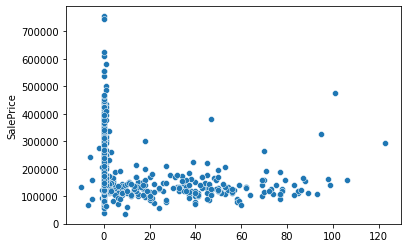

In [30]:
sns.scatterplot(x=housing.GarageYrBlt-housing.YearBuilt,y=housing.SalePrice)

In [31]:
(housing.GarageYrBlt-housing.YearBuilt).describe()

count    1379.000000
mean        5.547498
std        16.580490
min       -10.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       123.000000
dtype: float64

#### Yrbuilt and Garage Year built have strong correlation. Replace missing grarage built year with year of built

In [32]:
housing.GarageYrBlt[housing.GarageYrBlt.isnull()]=housing.YearBuilt[housing.GarageYrBlt.isnull()]

In [33]:
null_percentage()

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64


In [34]:
housing.dropna(subset=['MasVnrArea','Electrical'],inplace=True)

In [35]:
null_percentage()

LotFrontage    17.711923
dtype: float64


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

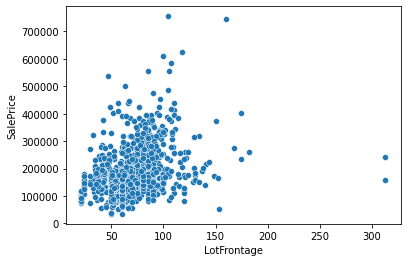

In [36]:
sns.scatterplot(x=housing.LotFrontage,y=housing.SalePrice)

In [37]:
housing.LotFrontage.describe()

count    1194.000000
mean       70.027638
std        24.299302
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

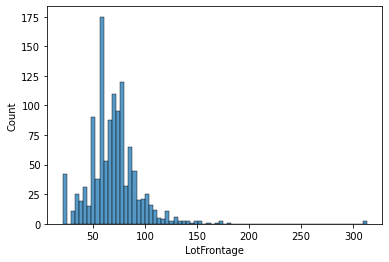

In [38]:
sns.histplot(housing.LotFrontage)

In [39]:
median_lotf=housing.LotFrontage.median()
median_lotf

69.0

In [40]:
housing.LotFrontage[housing.LotFrontage.isnull() == True]=median_lotf

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

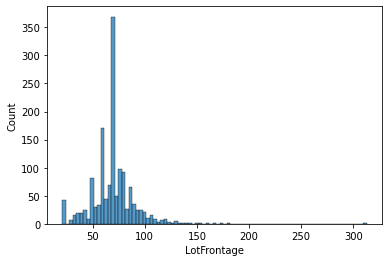

In [41]:
sns.histplot(housing.LotFrontage)

In [42]:
null_percentage()

Series([], dtype: float64)


# 4 Model Building and Evaluation

## 4.1 Data setting up

In [43]:
model_num_vars=['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',                   
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea', 'MiscVal','Property Age', 'Remodelled Age', 'Garage Built Diff','SalePrice']

In [44]:
ordinal_vars=['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC',  'KitchenQual','GarageCars','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape','PoolQC','OverallQual','OverallCond','FireplaceQu','BsmtFullBath',
             'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','TotRmsAbvGrd']

In [45]:
len(ordinal_vars)

27

In [46]:
cat_ord_vars=cat_vars.copy()

In [47]:
len(cat_vars)

57

In [48]:
model_cat_vars=[]
ord_vars=[]
for var in cat_ord_vars:
    if var not in ordinal_vars:
        model_cat_vars.append(var)
    else :
        ord_vars.append(var)
print(len(model_cat_vars))
print(len(ord_vars))

30
27


In [49]:
for var in ordinal_vars:
    if var not in ord_vars:
        print(var)

In [50]:
len(model_cat_vars)

30

In [51]:
all_vars=model_cat_vars+model_num_vars+ordinal_vars

In [52]:
len(all_vars)

80

In [53]:
housing_data=housing.copy()
housing_data.shape

(1451, 83)

In [54]:
for var in all_vars:
    if var not in housing_data.columns:
        print(var)

In [55]:
for var in housing_data.columns:
    if var not in all_vars:
        print(var)
        housing_data.drop(axis=1,columns=var,inplace=True)

YearBuilt
YearRemodAdd
GarageYrBlt


In [56]:
housing_data.shape

(1451, 80)

In [57]:
100*housing.Heating.value_counts().max()/housing.Heating.value_counts().sum()

97.7946243969676

In [58]:
imbalanced_vars=[]
for var in cat_vars:
    per_max=100*housing[var].value_counts().max()/housing[var].value_counts().sum()
    #print(var,per_max)
    if per_max >=90:
        imbalanced_vars.append(var)
print(imbalanced_vars)

['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature']


In [59]:
imbalanced_vars=[]

In [60]:

for column in model_cat_vars:
   
    dummy_df = pd.get_dummies(housing_data[column], prefix= column, drop_first = True)
    housing_data=pd.concat([housing_data, dummy_df], axis=1)


In [61]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 268 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(35), object(43), uint8(188)
memory usage: 1.2+ MB


In [62]:
housing_data.drop(model_cat_vars,axis=1,inplace=True)

In [63]:
housing_data.shape

(1451, 238)

In [64]:
housing_data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Property Age,Remodelled Age,Garage Built Diff,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,69.845624,10507.808408,6.093728,5.579600,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,180624.101999,36.722950,13.667815,13.667815,0.047553,0.002757,0.008270,0.099242,0.203997,0.041351,...,0.266713,0.055824,0.020675,0.917298,0.037216,0.108201,0.007581,0.806340,0.962784,0.001378,0.033770,0.000689,0.035837,0.071675,0.097174,0.138525,0.174363,0.161268,0.083391,0.042729,0.061337,0.053756,0.039972,0.225362,0.206754,0.232254,0.119917,0.002757,0.001378,0.006203,0.003446,0.003446,0.082012,0.002068,0.869056,0.002757,0.007581,0.013784,0.822192,0.084080
std,22.044429,9992.987081,1.381467,1.113415,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,79312.128273,30.238849,24.532257,24.532257,0.212893,0.052450,0.090595,0.299090,0.403106,0.199169,...,0.442393,0.229660,0.142344,0.275526,0.189355,0.310741,0.086768,0.395301,0.189355,0.037113,0.180698,0.026252,0.185949,0.258037,0.296297,0.345569,0.379552,0.367905,0.276567,0.202316,0.240030,0.225613,0.195962,0.417964,0.405117,0.422415,0.324977,0.052450,0.037113,0.078539,0.058621,0.058621,0.274478,0.045439,0.337456,0.052450,0.086768,0.116632,0.382483,0.277603
min,21.000000,1300.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [65]:
housing_data.head(5)

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,...,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,Reg,Gtl,7,5,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,RFn,2,548,TA,TA,0,61,...,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,Reg,Gtl,6,8,0.0,TA,TA,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,RFn,2,460,TA,TA,298,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,IR1,Gtl,7,5,162.0,Gd,TA,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,RFn,2,608,TA,TA,0,42,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,IR1,Gtl,7,5,0.0,TA,TA,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Unf,3,642,TA,TA,0,35,...,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,IR1,Gtl,8,5,350.0,Gd,TA,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,RFn,3,836,TA,TA,192,84,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [66]:
housing_data['LandSlope'] = housing_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
housing_data['ExterQual'] = housing_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['BsmtQual'] = housing_data.BsmtQual.map({'No Bsmt':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtCond'] = housing_data.BsmtCond.map({'No Bsmt':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['BsmtExposure'] = housing_data.BsmtExposure.map({'No Bsmt':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_data['BsmtFinType1'] = housing_data.BsmtFinType1.map({'No Bsmt':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['BsmtFinType2'] = housing_data.BsmtFinType2.map({'No Bsmt':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['HeatingQC'] = housing_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['KitchenQual'] = housing_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['GarageFinish'] = housing_data.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
housing_data['GarageQual'] = housing_data.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['GarageCond'] = housing_data.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['ExterCond'] = housing_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['LotShape'] = housing_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_data['PoolQC'] = housing_data.PoolQC.map({'No Pool':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['FireplaceQu'] = housing_data.FireplaceQu.map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
#housing_data['OverallQual'] = housing_data.OverallQual.map({'Very Poor':0,'Poor':1,'Fair':2,'Below Average':3,'Average':4,'Above Average':5,'Good':6,'Very Good':7,'Excellent':8,'Very Excellent':9})
#housing_data['OverallQual'] = housing_data.OverallCond.map({'Very Poor':0,'Poor':1,'Fair':2,'Below Average':3,'Average':4,'Above Average':5,'Good':6,'Very Good':7,'Excellent':8,'Very Excellent':9})

In [67]:
housing_data['FireplaceQu'].value_counts()

0    685
4    378
3    311
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [68]:
housing_data['FireplaceQu'].isnull().sum()

0

In [69]:
housing_data['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1451, dtype: int64

In [70]:
model_num_vars

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'Property Age',
 'Remodelled Age',
 'Garage Built Diff',
 'SalePrice']

In [71]:
(housing_data.dtypes=='Object').sum()

0

## 4.2 Linear Regression Model

In [72]:

scaler = StandardScaler()

In [73]:
len(housing_data.columns)

238

In [74]:
housing_data.reset_index()

,index,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_No Misc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2,2,548,3,3,0,...,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,2,2,460,3,3,298,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,68.0,11250,0,0,7,5,162.0,3,2,4,3,2,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,3,2,2,608,3,3,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3,60.0,9550,0,0,7,5,0.0,2,2,3,4,1,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,4,1,3,642,3,3,0,...,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,84.0,14260,0,0,8,5,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,3,2,3,836,3,3,192,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1455,62.0,7917,3,0,6,5,0.0,2,2,4,3,1,1,0,1,0,953,953,4,953,694,0,1647,0,0,2,1,3,1,2,7,1,3,2,2,460,3,3,0,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1447,1456,85.0,13175,3,0,6,6,119.0,2,2,4,3,1,5,790,3,163,589,1542,2,2073,0,0,2073,1,0,2,0,3,1,2,7,2,3,1,2,500,3,3,349,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1448,1457,66.0,9042,3,0,7,9,0.0,4,3,3,4,1,6,275,1,0,877,1152,4,1188,1152,0,2340,0,0,2,0,4,1,3,9,2,4,2,1,252,3,3,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1449,1458,68.0,9717,3,0,5,6,0.0,2,2,3,3,2,6,49,3,1029,0,1078,3,1078,0,0,1078,1,0,1,0,2,1,3,5,0,0,1,1,240,3,3,366,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [75]:

housing_train,housing_test=train_test_split(housing_data,train_size=0.7,test_size = 0.3, random_state=100)

In [76]:
housing_train.shape

(1015, 238)

In [77]:
y_train=housing_train.SalePrice
X_train=housing_train.drop('SalePrice',axis=1)
y_test=housing_test.SalePrice
X_test=housing_test.drop('SalePrice',axis=1)

In [78]:
X_train.shape

(1015, 237)

In [79]:
y_train.describe()

count      1015.000000
mean     181457.141872
std       79184.727673
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      215100.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [80]:
x_num_vars = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',                   
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea', 'MiscVal','Property Age', 'Remodelled Age', 'Garage Built Diff']

In [81]:
len(ordinal_vars)


27

In [82]:
X_train[x_num_vars]=scaler.fit_transform(X_train[x_num_vars])
X_test[x_num_vars]=scaler.transform(X_test[x_num_vars])

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [84]:

lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
X_train.isnull().sum()[X_train.isnull().sum() !=0]

Series([], dtype: int64)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
y_pred_train = lm.predict(X_train)
get_error_stats(y_train,y_pred_train,name="Train")


MSE Train 397343975.2946111
MAE Score Train 13925.680141625617
R2 Score Train 0.9365674946503871 



(397343975.2946111, 13925.680141625617, 0.9365674946503871)

## 4.3 Validate Linear Regression model assumptions

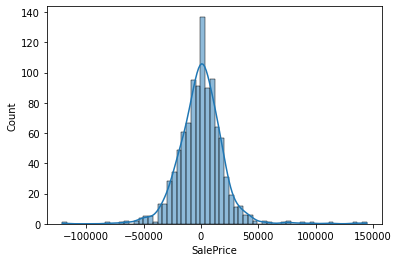

In [87]:
residual=y_train-y_pred_train
sns.histplot(residual,kde=True)
plt.show()

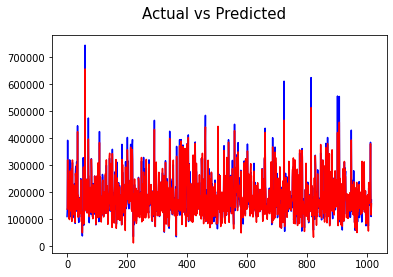

In [88]:
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_pred_train, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

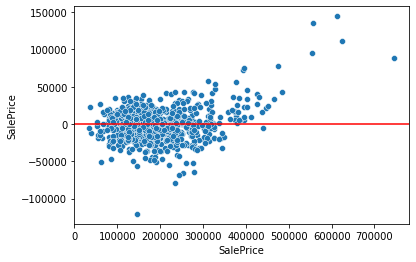

In [89]:
sns.scatterplot(y_train,residual)
plt.axhline(color='r')
plt.show()

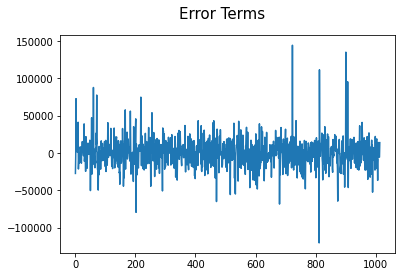

In [90]:
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, residual)
plt.suptitle('Error Terms', fontsize = 15)
plt.show()

In [91]:

y_pred_test = lm.predict(X_test)
get_error_stats(y_test,y_pred_test)
r2_score(y_test, y_pred_test)

MSE Test 5.215843485786369e+25
MAE Score Test 730292105807.4916
R2 Score Test -8237277860687073.0 



-8237277860687073.0

- Model seems to overfitting. Apply regularization

In [92]:
rfe=RFE(lm,100)
rfe=rfe.fit(X_train,y_train)
t=list(zip(X_train.columns,rfe.support_,rfe.ranking_))
vars=[]
[vars.append(t[i][0]) if t[i][1]==True else 'x' for i in range(len(t))]
X_train_rfe=X_train[vars]
X_test_rfe=X_test[vars]
lm_rfe=LinearRegression()
lm_rfe.fit(X_train_rfe,y_train)
y_pred_train_rfe = lm_rfe.predict(X_train_rfe)
get_error_stats(y_train,y_pred_train_rfe,name="Train")
y_pred_test_rfe = lm_rfe.predict(X_test_rfe)
get_error_stats(y_test,y_pred_test_rfe)
r2_score(y_test, y_pred_test)

MSE Train 512773868.49753696
MAE Score Train 15966.328078817734
R2 Score Train 0.9181401174322705 

MSE Test 7.725649733513747e+32
MAE Score Test 2324699631025535.5
R2 Score Test -1.220096494128242e+23 



-8237277860687073.0

#### With RFE too test r2 sore is poor

## 4.4 Ridge Regularization

In [93]:
ridge1 = Ridge()
ridge1.fit(X_train, y_train)
y_pred_train_ridge= ridge1.predict(X_train)
get_error_stats(y_train,y_pred_train_ridge,name="Train")

y_pred_test_ridge = ridge1.predict(X_test)
get_error_stats(y_test,y_pred_test_ridge)

MSE Train 596345995.344257
MAE Score Train 16130.277743874496
R2 Score Train 0.9047985551766643 

MSE Test 974081105.8075824
MAE Score Test 20856.636483744096
R2 Score Test 0.8461653086552947 



(974081105.8075824, 20856.636483744096, 0.8461653086552947)

## 4.5 Lasso Regularization

In [94]:

lasso1 = Lasso()
lasso1.fit(X_train, y_train)
print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train_lasso = lasso1.predict(X_train)
get_error_stats(y_train,y_pred_train_lasso,name="Train")

y_pred_test_lasso = lasso1.predict(X_test)
get_error_stats(y_test,y_pred_test_lasso)


Number of non-zero Coefficients 226
MSE Train 397597729.66153395
MAE Score Train 13935.111285734352
R2 Score Train 0.9365269849755509 

MSE Test 2568481919.4910183
MAE Score Test 22299.99674504392
R2 Score Test 0.5943647598196935 



(2568481919.4910183, 22299.99674504392, 0.5943647598196935)

#### It is visioble that Regularization improving test data accuracy without much affecting training accuracy. Lets tune the Ridge and Lasso hyperpameters to get best model

# 5 HyperParameter Tuning

## 5.1 Lasso Hyperparameter Tuning 

In [95]:
# list of alphas to tune
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
print(params)

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train) 

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   14.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [96]:
lasso_cv_results = pd.DataFrame(model_lasso_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.116108,0.011058,0.000789,0.000395,0.0001,{'alpha': 0.0001},-25124.518505,-17140.731410,-24630.613438,-27161.417784,-22369.483907,-23285.353009,3429.615847,28,-12836.313848,-14014.895951,-13581.559104,-13507.700446,-13021.150387,-13392.323947,420.389016
1,0.114890,0.012491,0.000993,0.000012,0.001,{'alpha': 0.001},-25124.996450,-17140.583808,-24626.996074,-27160.336203,-22369.637120,-23284.509931,3429.183851,27,-12836.328891,-14014.910879,-13581.558532,-13507.729814,-13021.157903,-13392.337204,420.389692
2,0.139222,0.025504,0.001001,0.000009,0.01,{'alpha': 0.01},-25129.727868,-17138.968221,-24593.711321,-27149.484876,-22371.170228,-23276.612503,3425.154867,26,-12836.524239,-14015.061089,-13581.564739,-13508.144716,-13021.233041,-13392.505565,420.392599
3,0.134447,0.025161,0.000801,0.000401,0.05,{'alpha': 0.05},-25143.975306,-17131.969411,-24501.579000,-27101.353635,-22366.879433,-23249.151357,3411.648103,25,-12837.441282,-14015.769566,-13581.591373,-13510.268375,-13021.491763,-13393.312472,420.434033
4,0.119297,0.013953,0.000986,0.000013,0.1,{'alpha': 0.1},-25147.483871,-17122.925789,-24383.366199,-27041.472433,-22346.802885,-23208.410235,3394.359500,24,-12838.663828,-14016.651845,-13581.622378,-13512.954084,-13021.833089,-13394.345045,420.464845


In [97]:
model_lasso_cv.best_params_

{'alpha': 100}

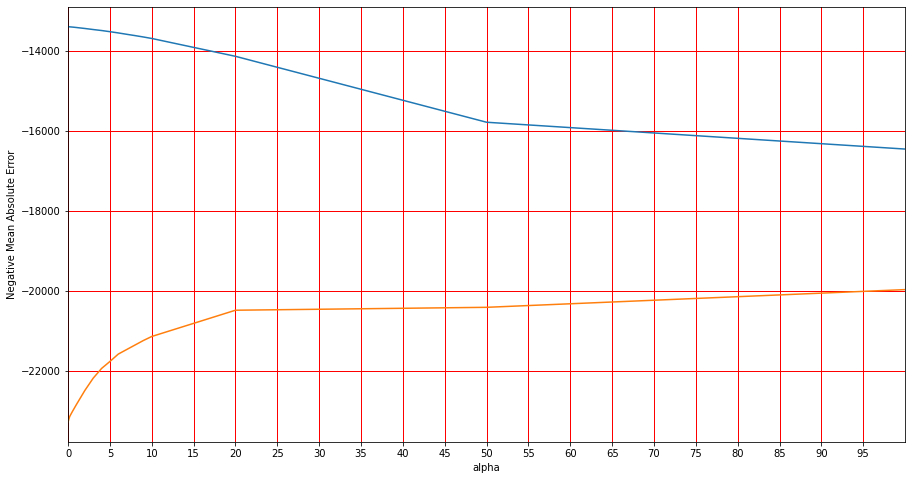

In [98]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(15, 8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100,5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [99]:
alpha = model_lasso_cv.best_params_['alpha']
print(alpha)
lasso_tuned = Lasso(alpha=alpha)

lasso_tuned.fit(X_train, y_train)

y_train_pred_lasso = lasso_tuned.predict(X_train)
y_test_pred_lasso = lasso_tuned.predict(X_test)
get_error_stats(y_train,y_train_pred_lasso,name="Train")
get_error_stats(y_test,y_test_pred_lasso,name="Test")

print("Number of non-zero Coefficients {}".format(np.sum(lasso_tuned.coef_!=0)))

100
MSE Train 682393048.7786494
MAE Score Train 16666.23623120034
R2 Score Train 0.8910618924444597 

MSE Test 911305026.1806912
MAE Score Test 19360.11783827708
R2 Score Test 0.8560794100331537 

Number of non-zero Coefficients 112


- At best alpha 100, the model shows test accuracy .85 whihc is close to train accuracy .89


#### Top 10 Features of best Lasso model

In [100]:
lasso_model_param = list(lasso_tuned.coef_)
lasso_model_param.insert(0,lasso_tuned.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
140,Exterior1st_AsphShn,40875.353667
94,Neighborhood_OldTown,39404.526667
93,Neighborhood_NridgHt,36141.514312
100,Neighborhood_Timber,29453.060430
23,BsmtFullBath,28869.274137
123,HouseStyle_2.5Fin,21872.620930
134,RoofMatl_Membran,20700.643103
161,Exterior2nd_MetalSd,18345.483668
84,Neighborhood_Edwards,16085.782354
35,GarageArea,14156.813466


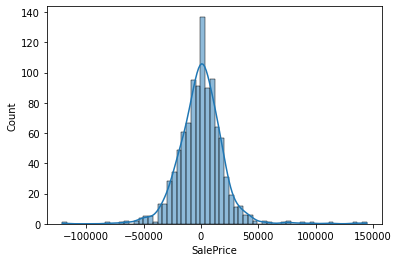

In [101]:
residual_lasso=y_test-y_pred_test_lasso
sns.histplot(residual,kde=True)
plt.show()

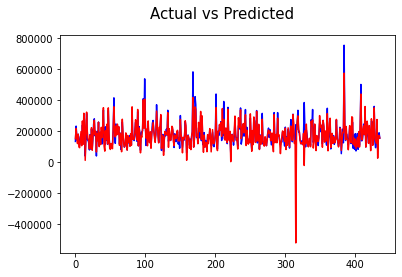

In [102]:
c = [i for i in range(0, len(X_test), 1)]
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred_test_lasso, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

## 5.2 Ridge Hyperparameter Tuning

In [103]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()

folds = 5
model_ridge_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [104]:
ridge_cv_results = pd.DataFrame(model_ridge_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006980,0.001262,0.000798,3.990413e-04,0.0001,{'alpha': 0.0001},-25184.766468,-18863.784374,-24502.431796,-38607.901887,-22569.896989,-25945.756303,6701.387535,28,-12835.506073,-14014.468485,-13580.086220,-13082.116753,-13020.511085,-13306.537723,431.286811
1,0.006173,0.000986,0.001001,8.031557e-06,0.001,{'alpha': 0.001},-25181.334109,-18848.288892,-24438.936581,-32791.235206,-22515.753968,-24755.109751,4577.470743,27,-12836.623749,-14013.020370,-13573.300178,-13231.385665,-13016.240788,-13334.114150,418.859625
2,0.007381,0.001350,0.000995,3.648350e-06,0.01,{'alpha': 0.01},-25148.706782,-18874.498396,-23910.239000,-23079.034688,-22130.994230,-22628.694619,2123.078823,26,-12847.018947,-14057.986050,-13594.719095,-13697.300293,-13071.843936,-13453.773664,437.781919
3,0.006982,0.000892,0.000801,4.007326e-04,0.05,{'alpha': 0.05},-25025.617206,-19345.906975,-22898.617828,-21982.325089,-21709.130977,-22192.319615,1838.807564,25,-12888.298961,-14624.082110,-14097.727161,-14247.469202,-13740.056834,-13919.526854,588.445426
4,0.006185,0.001466,0.000800,3.998614e-04,0.1,{'alpha': 0.1},-24905.885035,-19703.431881,-22524.559307,-21202.709234,-21647.678598,-21996.852811,1717.749041,24,-12932.747961,-15127.314436,-14618.537898,-14698.527632,-14317.354257,-14338.896437,749.246887
5,0.006782,0.000977,0.000598,4.883051e-04,0.2,{'alpha': 0.2},-24725.258907,-19906.117473,-22259.029166,-20771.556624,-21559.314123,-21844.255259,1640.760269,23,-13001.308896,-15643.993353,-15194.798765,-15279.149200,-14898.997070,-14803.649457,931.965484
6,0.006584,0.001200,0.000797,3.986140e-04,0.3,{'alpha': 0.3},-24596.399162,-20047.042327,-22100.233714,-20540.534625,-21446.596541,-21746.161274,1592.451139,22,-13056.246860,-15906.314107,-15494.807875,-15623.306626,-15218.404903,-15059.816074,1025.937464
7,0.005386,0.000488,0.000797,3.987314e-04,0.4,{'alpha': 0.4},-24492.414167,-20111.158541,-21958.767641,-20425.738498,-21315.052728,-21660.626315,1559.046510,21,-13103.163714,-16072.645223,-15689.654394,-15851.291811,-15440.188021,-15231.388633,1083.968505
8,0.008179,0.000977,0.000997,6.304502e-04,0.5,{'alpha': 0.5},-24407.692489,-20211.406632,-21827.310184,-20331.393285,-21195.104411,-21594.581400,1525.526480,19,-13144.228518,-16195.857775,-15835.722060,-16016.565012,-15606.337736,-15359.742220,1124.844213
9,0.006585,0.001354,0.001196,4.003640e-04,0.6,{'alpha': 0.6},-24344.079296,-20272.850332,-21712.429002,-20253.119644,-21089.471433,-21534.389941,1507.125769,18,-13178.757796,-16293.833462,-15947.166672,-16141.602742,-15738.967228,-15460.065580,1155.775116


In [105]:
model_ridge_cv.best_params_

{'alpha': 50}

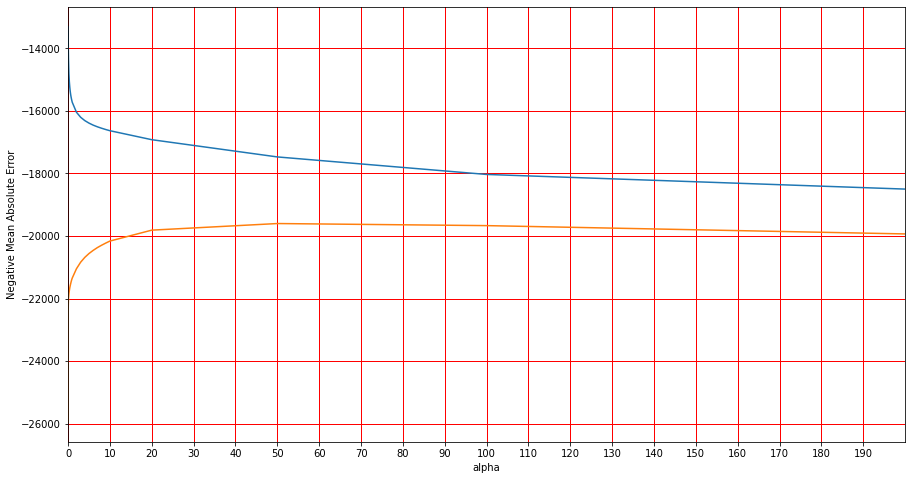

In [106]:
plt.figure(figsize=(15, 8))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [107]:
alpha_ridge = model_ridge_cv.best_params_['alpha']
ridge_tuned = Ridge(alpha=alpha_ridge)

ridge_tuned.fit(X_train, y_train)

y_train_pred_ridge = ridge_tuned.predict(X_train)
y_test_pred_ridge = ridge_tuned.predict(X_test)
get_error_stats(y_train,y_train_pred_ridge,name="Train")
get_error_stats(y_test,y_test_pred_ridge,name="Test")

MSE Train 858788105.8589576
MAE Score Train 17443.713099772285
R2 Score Train 0.8629019577339971 

MSE Test 936744099.4226735
MAE Score Test 19436.235990034933
R2 Score Test 0.8520618678008453 



(936744099.4226735, 19436.235990034933, 0.8520618678008453)

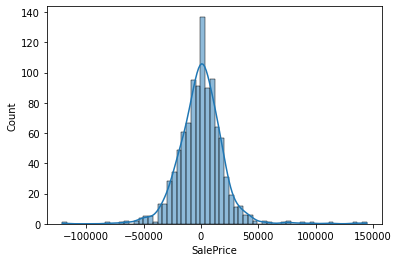

In [108]:
residual_lasso=y_test-y_pred_test_ridge
sns.histplot(residual,kde=True)
plt.show()

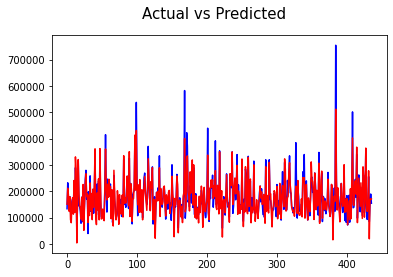

In [109]:
c = [i for i in range(0, len(X_test), 1)]
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred_test_ridge, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

#### Top10 Ridge model features

In [110]:
ridge_model_param = list(ridge_tuned.coef_)
ridge_model_param.insert(0,ridge_tuned.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,ridge_model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
5,OverallCond,13662.666717
94,Neighborhood_OldTown,13431.487911
93,Neighborhood_NridgHt,12192.099291
23,BsmtFullBath,11893.001275
35,GarageArea,10861.431060
123,HouseStyle_2.5Fin,10612.631715
104,Condition1_PosA,8804.870556
21,LowQualFinSF,7772.233267
20,2ndFlrSF,7577.752528
100,Neighborhood_Timber,6726.807067


# 6. Subjective Quesions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [111]:
alpha_ridge = model_ridge_cv.best_params_['alpha']
ridge_tuned = Ridge(alpha=2*alpha_ridge)

ridge_tuned.fit(X_train, y_train)

y_train_pred_ridge = ridge_tuned.predict(X_train)



y_test_pred_ridge = ridge_tuned.predict(X_test)

get_error_stats(y_train,y_train_pred_ridge,name="Train")
get_error_stats(y_test,y_test_pred_ridge,name="Test")
print("Number of non-zero Coefficients {}".format(np.sum(ridge_tuned.coef_!=0)))
print(len(X_train.columns))

MSE Train 932539167.7083619
MAE Score Train 17968.75961309132
R2 Score Train 0.8511282429775741 

MSE Test 966040798.953699
MAE Score Test 19543.994024848103
R2 Score Test 0.8474350983225096 

Number of non-zero Coefficients 233
237


In [112]:
ridge_model_param = list(ridge_tuned.coef_)
ridge_model_param.insert(0,ridge_tuned.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,ridge_model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
5,OverallCond,13614.655337
23,BsmtFullBath,10375.224770
35,GarageArea,8855.067280
94,Neighborhood_OldTown,8786.077185
93,Neighborhood_NridgHt,7771.885877
104,Condition1_PosA,7210.578299
20,2ndFlrSF,7090.163545
123,HouseStyle_2.5Fin,7065.916954
30,TotRmsAbvGrd,6522.101262
8,ExterCond,6356.296396


In [113]:
print(ridge_coef.sort_values(by='Coef',ascending=False).head(10)['Featuere'])

5               OverallCond
23             BsmtFullBath
35               GarageArea
94     Neighborhood_OldTown
93     Neighborhood_NridgHt
104         Condition1_PosA
20                 2ndFlrSF
123       HouseStyle_2.5Fin
30             TotRmsAbvGrd
8                 ExterCond
Name: Featuere, dtype: object


In [114]:
alpha = model_lasso_cv.best_params_['alpha']
print(alpha)
lasso_tuned = Lasso(alpha=2*alpha)

lasso_tuned.fit(X_train, y_train)

y_train_pred_lasso = lasso_tuned.predict(X_train)
y_test_pred_lasso = lasso_tuned.predict(X_test)
get_error_stats(y_train,y_train_pred_lasso,name="Train")
get_error_stats(y_test,y_test_pred_lasso,name="Test")
print("Number of non-zero Coefficients {}".format(np.sum(lasso_tuned.coef_!=0)))

100
MSE Train 788713218.1914268
MAE Score Train 17184.29438292
R2 Score Train 0.8740888032965816 

MSE Test 890898039.9330503
MAE Score Test 18957.587103639748
R2 Score Test 0.8593022447765489 

Number of non-zero Coefficients 81


In [115]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
140,Exterior1st_AsphShn,40875.353667
94,Neighborhood_OldTown,39404.526667
93,Neighborhood_NridgHt,36141.514312
100,Neighborhood_Timber,29453.060430
23,BsmtFullBath,28869.274137
123,HouseStyle_2.5Fin,21872.620930
134,RoofMatl_Membran,20700.643103
161,Exterior2nd_MetalSd,18345.483668
84,Neighborhood_Edwards,16085.782354
35,GarageArea,14156.813466


Answer :
For ridge regression the optimal value of alpha is 50
For lasso regression the optimal value of alpha is 100

When alpha is doubled for lasso regression
 a) MSE or train set increased
 b) R2 Square on train set decreased , R2 on test data too slightly decreased
 
Most important predcitor varaibles are 

- OverallCond
- BsmtFullBath
- GarageArea
- Neighborhood_OldTown
- Neighborhood_NridgHt
- Condition1_PosA
- 2ndFlrSF
- HouseStyle_2.5Fin
- TotRmsAbvGrd
- ExterCond

When alpha is doubled for lasso regression
 a) MSE or train set increased
 b) R2 Square on train set decreased , R2 on test data too slightly decreased
 c) number of non zero coeffcients reduced to 81 from 112
 
Most important predcitor varaibles are 

- Exterior1st_AsphShn	
- Neighborhood_OldTown	
- Neighborhood_NridgHt	
- Neighborhood_Timber	
- BsmtFullBath	
- HouseStyle_2.5Fin	
- RoofMatl_Membran
- Exterior2nd_MetalSd	
- Neighborhood_Edwards	
- GarageArea

Question 2:

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?
Answer:
The test accuracy of Lasso Regression model(85.93) is slightly higher than that of Ridge Regression model (85.20). Also the numbe of features reduced to 112 for Lasso regression. Since Lasso regression is giving simple model with better accuracy, the Lasso regression model will be chosen to apply


In [116]:
X_train_new=X_train.drop(['Exterior1st_AsphShn','Neighborhood_OldTown','Neighborhood_NridgHt','Neighborhood_Timber','BsmtFullBath'],axis=1)
X_test_new=X_test.drop(['Exterior1st_AsphShn','Neighborhood_OldTown','Neighborhood_NridgHt','Neighborhood_Timber','BsmtFullBath'],axis=1)


In [117]:
# list of alphas to tune
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
print(params)

# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train_new, y_train) 

{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   13.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [118]:
alpha = model_lasso_cv.best_params_['alpha']
print(alpha)
lasso_tuned = Lasso(alpha=alpha)

lasso_tuned.fit(X_train_new, y_train)

y_train_pred_lasso = lasso_tuned.predict(X_train_new)
y_test_pred_lasso = lasso_tuned.predict(X_test_new)
get_error_stats(y_train,y_train_pred_lasso,name="Train")
get_error_stats(y_test,y_test_pred_lasso,name="Test")

print("Number of non-zero Coefficients {}".format(np.sum(lasso_tuned.coef_!=0)))

100
MSE Train 724004273.9166405
MAE Score Train 17123.479166151563
R2 Score Train 0.8844190227263207 

MSE Test 958453385.9656215
MAE Score Test 19667.554035406287
R2 Score Test 0.8486333633624192 

Number of non-zero Coefficients 115


In [119]:
lasso_model_param = list(lasso_tuned.coef_)
lasso_model_param.insert(0,lasso_tuned.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,lasso_model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
136,Exterior1st_BrkComm,42958.147061
23,BsmtHalfBath,27632.250884
130,RoofMatl_Membran,24695.507421
92,Neighborhood_SWISU,23172.979111
119,HouseStyle_2.5Fin,21128.006938


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Answer :
 The Five most important predictor varaibles in lasso model are 
- Exterior1st_AsphShn	
- Neighborhood_OldTown
- Neighborhood_NridgHt
- Neighborhood_Timber
- BsmtFullBath

After removing the above predcitors the most important varaibles are

- Exterior1st_BrkComm
- BsmtHalfBath
- RoofMatl_Membran
- Neighborhood_SWISU
- HouseStyle_2.5Fin


Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

To make model robust and generalization it should perform well in training and testin set. To ensure that
1. Model should avoid underfitting by increasing more data or increasing complexity of model by adding more features, allowing nonlinearity through data transformation (ex: Polynomial degree). This ensures model performas very well on training data
2. Model should avoid overfitting, regularization method should be applied. This reduces the complexity of the model
3. Bias & Variance tradeoff should be applied to get optimal value


When model is robust and generalized it may perform little worse in training set as bias is increased. But since the model is genralized and variance is decreased the model perfoms well in test data set.There for the accuracy diffrence between training and test dataset is less